In [379]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

TO DO:

* ~~normalize the time series before taking the correlation~~
* ✓ use normalized correlation measure
* ✓ do a partitioning based on similarity
* ✓ sort adjacency matrix based on similarity
* ✓ visualize the partition
* ✓ stackplot of activity broken down by partitition
* convolve the time series with a declining 'response time'
* use a better correlation metric--do the math correctly
  * ✓ take the log of activity before correlating

In [380]:
%matplotlib inline

Resources for this:

http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html  !!!

http://www.fil.ion.ucl.ac.uk/~wpenny/course/array.pdf
http://stats.stackexchange.com/questions/29096/correlation-between-two-time-series
http://perso.crans.org/aynaud/communities/api.html

In [381]:
from bigbang.archive import Archive

arx = Archive("ipython-user",archive_dir="../archives")

Get the activity of a list

In [382]:
act = arx.get_activity()

Since are going to be computing correlations between N different time series data sets and that's an $O(N^2)$ operation, let's limit N.

In [383]:
cutoff = 10

def filtered_participants(cutoff):
    xc = act.sum() > 10
    ffc = [l for l in xc.keys() if xc[l]]
    return ffc

filtered_participants(cutoff)[:10]

['Barry.Carroll at psc.com (Carroll, Barry)',
 'Fernando.Perez at colorado.edu (Fernando Perez)',
 'Fernando.Perez at colorado.edu (Fernando.Perez at colorado.edu)',
 'Fernando.Perez at colorado.edu (Fernando.Perez@colorado.edu)',
 'Fernando.Perez@berkeley.... (Fernando Perez)',
 'PrabhuRamachandran (Prabhu Ramachandran)',
 'a.schmolck at gmx.net (Alexander Schmolck)',
 'a.schmolck@gmx.... (Alexander Schmolck)',
 'aisaac at american.edu (Alan G Isaac)',
 'alejandro.weinstein@gmail.... (Alejandro Weinstein)']

In [384]:
from scipy.stats.stats import pearsonr  

fc = filtered_participants(cutoff)

n = len(fc)

pc = np.zeros([n,n])

for i in range(0,n):
    for j in range(i,n):
        # since pearson correlation assumes normally distributed data
        # and we believe activity to be log-normally distributed (see Shalizi...)
        # we'll take the log of values here
        si = np.log1p(act[fc[i]])
        sj = np.log1p(act[fc[j]])

        c = pearsonr(si,sj)[0]
        pc[i,j] = c
        pc[j,i] = c
        
pc

array([[ 1.        , -0.00174809, -0.0021263 , ..., -0.00164145,
        -0.00121498, -0.00353389],
       [-0.00174809,  1.        ,  0.12379761, ..., -0.01078422,
         0.08808938, -0.02321744],
       [-0.0021263 ,  0.12379761,  1.        , ..., -0.00275926,
        -0.00204237, -0.00594043],
       ..., 
       [-0.00164145, -0.01078422, -0.00275926, ...,  1.        ,
        -0.00157666, -0.00458585],
       [-0.00121498,  0.08808938, -0.00204237, ..., -0.00157666,
         1.        , -0.0033944 ],
       [-0.00353389, -0.02321744, -0.00594043, ..., -0.00458585,
        -0.0033944 ,  1.        ]])

In [385]:
G = nx.Graph(pc)
labels = dict(enumerate(fc))
G = nx.relabel_nodes(G,labels)

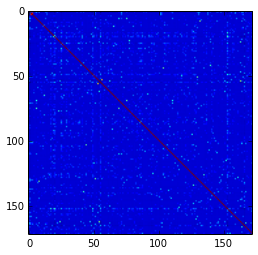

In [386]:
plt.imshow(pc)

In [387]:
# from http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[],cmap="Greys"):
    """
    - G is a networkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap=cmap,
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    current_idx = 0
    for partition, color in zip(partitions, colors):
        #for module in partition:
        ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                      len(partition), # Width
                                      len(partition), # Height
                                      facecolor="none",
                                      edgecolor=color,
                                      linewidth="1"))
        current_idx += len(partition)

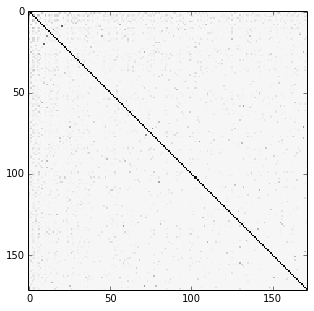

In [388]:
# order nodes by number of messages sent by each participant
o = list(act[fc].sum().order(ascending=False).keys())
draw_adjacency_matrix(G,node_order=o)

In [389]:
from sklearn import cluster

n_clusters = 6
sc = cluster.SpectralClustering(n_clusters=n_clusters)
partition = sc.fit_predict(pc)
partition_order = [fc[x] for x in np.argsort(partition)]

In [390]:
np.sort(partition)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5], dtype=int32)

In [391]:
from collections import defaultdict

parts = defaultdict(list)
for i in range(len(partition)):
    parts[partition[i]].append(fc[i])
    
colors = [plt.cm.hsv(1. / (k + 1)) for k in parts.keys()]

In [392]:
colors

[(1.0, 0.0, 0.09375, 1.0),
 (0.0, 1.0, 0.96470316317617644, 1.0),
 (0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0),
 (0.51764557646910592, 1.0, 0.0, 1.0),
 (0.81874881874881877, 1.0, 0.0, 1.0),
 (0.98823496985261694, 0.96103006029476612, 0.0, 1.0)]

In [393]:
len(parts.values())

6

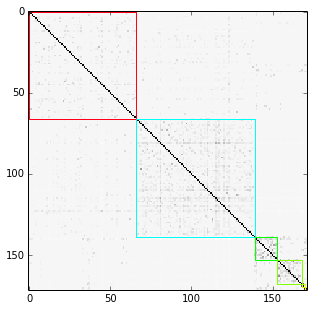

In [394]:
draw_adjacency_matrix(G,
                      node_order=partition_order,
                      partitions=parts.values(),
                      colors=colors)

In [395]:
for k,v in parts.items():
    print str(k) + ": " + str(len(v))

0: 66
1: 73
2: 14
3: 15
4: 2
5: 2


In [396]:
node_parts = {}

for k,v in parts.items():
    for n in v:
        node_parts[n] = int(k)

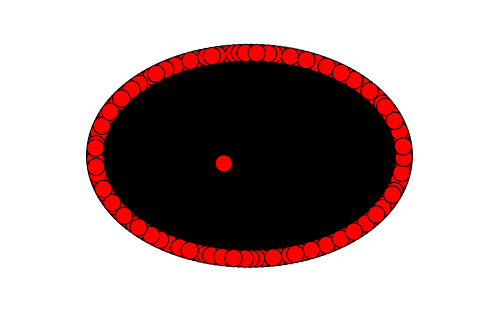

In [397]:
import networkx as nx

#FG = nx.Graph(pc > .01)
FG = nx.from_numpy_matrix(pc)

labels = dict(enumerate(fc))
FG = nx.relabel_nodes(FG,labels)
nx.set_node_attributes(FG,'corr-cluster',node_parts)


pos = nx.spring_layout(FG, k = 0.6, iterations = 1000)
nx.draw(FG,pos)
nx.write_gexf(FG,'corr.gexf')

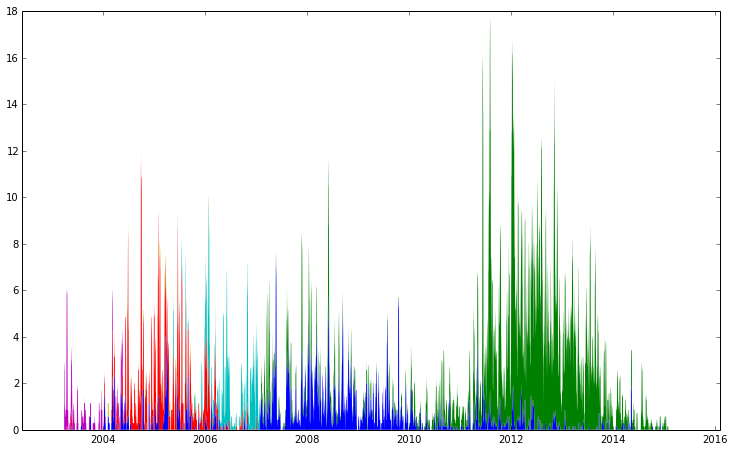

In [398]:
s = 7

part_activity = [np.convolve(act.as_matrix(part).sum(1),np.array([1. / s] * s),mode='same')
                 for part in parts.values()]

fig = plt.figure(figsize=(12.5, 7.5))

d = np.row_stack(part_activity)

plt.stackplot(act.index,d,linewidth=0)

fig.axes[0].xaxis_date()

plt.show()

In [399]:
parts.items()

[(0,
  ['Fernando.Perez@berkeley.... (Fernando Perez)',
   'PrabhuRamachandran (Prabhu Ramachandran)',
   'a.schmolck@gmx.... (Alexander Schmolck)',
   'amcmorl@gmail.... (Angus McMorland)',
   'arnd.baecker at web.de (Arnd Baecker)',
   'barrywark@gmail.... (Barry Wark)',
   'cappy2112@gmail.... (Tony Cappellini)',
   'carl.input@gmail.... (Carl Joseph Younger)',
   'cimrman3@ntc.zcu... (Robert Cimrman)',
   'cohen@slac.stanford.... (Johann Cohen-Tanugi)',
   'cygnus at cprogrammer.org (Jonathan Daugherty)',
   'david@ar.media.kyoto-u.ac... (David Cournapeau)',
   'djmuhlestein@gmail.... (Dennis Muhlestein)',
   'dwf@cs.toronto.... (David Warde-Farley)',
   'ellisonbg.net@gmail.... (Brian Granger)',
   'fccoelho@gmail.... (Flavio Coelho)',
   'fredmfp@gmail.... (fred)',
   'fw3@hotmail.co... (wang frank)',
   'gael.varoquaux@normalesup.... (Gael Varoquaux)',
   'gokhansever@gmail.... (=?UTF-8?Q?G=C3=B6khan_SEVER?=)',
   'gokhansever@gmail.... (=?UTF-8?Q?G=C3=B6khan_Sever?=)',
   'jdh2